Step 1: Load the data 

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Load the data 
data = pd.read_csv('TRAFFIC ACCIDENTS DATA.csv')  # Load your dataset


# drop uneccesary columns 
columns_to_drop = ['Brief Accident Details/Cause', 'Weather conditions','Victims','Date']
data.drop(columns=columns_to_drop, inplace=True)

#inspect the data 
print(data.head())  


  Accident Spot      Area     County                Road/ Highway  \
0         Sobea     Sobea     Nakuru       Nakuru-Eldoret Highway   
1    Maai-Mahiu  Naivasha     Nakuru  Maai-Mahiu Naivasha Highway   
2       Ntulele   Ntulele      Narok        Narok Maai Mahiu road   
3         Suswa     Suswa      Narok        Narok Maai Mahiu road   
4        Mutira    Mutira  Kirinyaga       Kerugoya-Karatina Road   

  Total people confirmed dead Time of the Accidents  
0                           4               4.30 pm  
1                           1               5.50 pm  
2                           4                   NaN  
3                           3               6.00 pm  
4                           1                   NaN  


Map the frequecy of accidents to the road 

In [40]:
import pandas as pd


# Specify the feature to analyze
feature = 'Road/ Highway'  

# Check if the feature exists in the DataFrame
if feature in data.columns:
    # Get unique values and their frequency
    frequency = data[feature].value_counts()
    data['Number of Accidents'] = data[feature].map(frequency)
    print(data.head()) 
else:
    print("feature not found")


  Accident Spot      Area     County                Road/ Highway  \
0         Sobea     Sobea     Nakuru       Nakuru-Eldoret Highway   
1    Maai-Mahiu  Naivasha     Nakuru  Maai-Mahiu Naivasha Highway   
2       Ntulele   Ntulele      Narok        Narok Maai Mahiu road   
3         Suswa     Suswa      Narok        Narok Maai Mahiu road   
4        Mutira    Mutira  Kirinyaga       Kerugoya-Karatina Road   

  Total people confirmed dead Time of the Accidents  Number of Accidents  
0                           4               4.30 pm                   10  
1                           1               5.50 pm                    1  
2                           4                   NaN                    5  
3                           3               6.00 pm                    5  
4                           1                   NaN                    1  


In [ ]:
# Specify the features for analysis
road_feature = 'Road/ Highway'  # Column for road names
spot_feature = 'Accident Spot'  # Column for accident spots (can also use 'Area')

# Check if both features exist in the DataFrame
if road_feature in data.columns and spot_feature in data.columns:
    # Count the unique spots for each road
    unique_spots_count = data.groupby(road_feature)[spot_feature].nunique()
    
    # Map the count back to the DataFrame
    data['Number of Spots'] = data[road_feature].map(unique_spots_count)
    
    # Display the updated DataFrame (optional)
    print(data.head())

else:
    print(f"One or both features '{road_feature}' and '{spot_feature}' are not found in the DataFrame.")

  Accident Spot      Area     County                Road/ Highway  \
0         Sobea     Sobea     Nakuru       Nakuru-Eldoret Highway   
1    Maai-Mahiu  Naivasha     Nakuru  Maai-Mahiu Naivasha Highway   
2       Ntulele   Ntulele      Narok        Narok Maai Mahiu road   
3         Suswa     Suswa      Narok        Narok Maai Mahiu road   
4        Mutira    Mutira  Kirinyaga       Kerugoya-Karatina Road   

  Total people confirmed dead Time of the Accidents  Number of Accidents  \
0                           4               4.30 pm                   10   
1                           1               5.50 pm                    1   
2                           4                   NaN                    5   
3                           3               6.00 pm                    5   
4                           1                   NaN                    1   

   Number of Spots  
0                6  
1                1  
2                3  
3                3  
4                1  


In [42]:
if 'Number of Accidents' in data.columns and 'Number of Spots' in data.columns:
    max_accidents = data['Number of Accidents'].max()
    max_spots = data['Number of Spots'].max()
    data['Score'] = ((0.4 * data['Number of Accidents'])/max_accidents) + ((0.6 * data['Number of Spots'])/max_spots)
    print(data.head())
    bins = [0, 0.10, 0.30, 0.80, 1.0]  # Define the bins for the score categories
    labels = ['Safe', 'Mild danger', 'Dangerous', 'Very dangerous']  # Define corresponding labels
    data['Danger Category'] = pd.cut(data['Score'], bins=bins, labels=labels, right=True, include_lowest=True)




  Accident Spot      Area     County                Road/ Highway  \
0         Sobea     Sobea     Nakuru       Nakuru-Eldoret Highway   
1    Maai-Mahiu  Naivasha     Nakuru  Maai-Mahiu Naivasha Highway   
2       Ntulele   Ntulele      Narok        Narok Maai Mahiu road   
3         Suswa     Suswa      Narok        Narok Maai Mahiu road   
4        Mutira    Mutira  Kirinyaga       Kerugoya-Karatina Road   

  Total people confirmed dead Time of the Accidents  Number of Accidents  \
0                           4               4.30 pm                   10   
1                           1               5.50 pm                    1   
2                           4                   NaN                    5   
3                           3               6.00 pm                    5   
4                           1                   NaN                    1   

   Number of Spots     Score  
0                6  0.877922  
1                1  0.122078  
2                3  0.438961  
3   

FINDING THE BEST MODEL 

In [91]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def test_models_with_hyperparameter_tuning(X, y, text_column, search_method="random"):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Define a preprocessor for text columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('text', TfidfVectorizer(stop_words='english', max_features=100), text_column),
            ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns)
        ]
    )

    # Define models and hyperparameters
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }

    hyperparameters = {
        'Logistic Regression': {
            'model__C': [0.1, 1, 10, 100],
            'model__solver': ['lbfgs', 'liblinear']
        },
        'Random Forest': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        },
        'SVM': {
            'model__C': [0.1, 1, 10],
            'model__gamma': ['scale', 'auto'],
            'model__kernel': ['linear', 'rbf']
        },
        'Gradient Boosting': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 10]
        },
        'K-Nearest Neighbors': {
            'model__n_neighbors': [1, 3, 5, 10],
            'model__weights': ['uniform', 'distance']
        }
    }

    # Results list
    results = []

    # Loop through each model and perform hyperparameter tuning
    for model_name, model in models.items():
        # Create a pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Select the hyperparameter search method
        if search_method == "random":
            search = RandomizedSearchCV(
                estimator=pipeline,
                param_distributions=hyperparameters[model_name],
                n_iter=10,  # Number of iterations for random search
                scoring='accuracy',
                cv=5,
                random_state=42,
                n_jobs=-1
            )
        elif search_method == "grid":
            search = GridSearchCV(
                estimator=pipeline,
                param_grid=hyperparameters[model_name],
                scoring='accuracy',
                cv=5,
                n_jobs=-1
            )
        else:
            raise ValueError("Invalid search method. Choose 'random' or 'grid'.")

        # Fit the search to the training data
        search.fit(X_train, y_train)

        # Get the best model and evaluate on test data
        best_model = search.best_estimator_
        test_accuracy = best_model.score(X_test, y_test)

        # Append results
        results.append({
            'Model': model_name,
            'Best Parameters': search.best_params_,
            'Test Accuracy': test_accuracy,
            'Mean CV Accuracy': search.best_score_
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Sort results by Mean CV Accuracy
    results_df = results_df.sort_values(by='Mean CV Accuracy', ascending=False).reset_index(drop=True)

    return results_df

# Assuming 'data' is your DataFrame with features and target
X = data[['Accident Spot', "Number of Spots"]]
y = data['Danger Category']

# Call the function for hyperparameter tuning using RandomizedSearchCV
results = test_models_with_hyperparameter_tuning(X, y, text_column='Accident Spot', search_method="random")

# Display the results
pd.set_option('display.max_colwidth', None) 
print(results)


/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


                 Model  \
0  K-Nearest Neighbors   
1                  SVM   
2        Random Forest   
3  Logistic Regression   
4    Gradient Boosting   

                                                                       Best Parameters  \
0                               {'model__weights': 'uniform', 'model__n_neighbors': 3}   
1                  {'model__kernel': 'linear', 'model__gamma': 'auto', 'model__C': 10}   
2  {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__max_depth': 10}   
3                                           {'model__solver': 'lbfgs', 'model__C': 10}   
4   {'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.01}   

   Test Accuracy  Mean CV Accuracy  
0       0.904762          0.933333  
1       0.952381          0.916667  
2       1.000000          0.916667  
3       0.952381          0.900000  
4       0.952381          0.883333  


/home/eric-kaz/Desktop/Semester4.1/KnowledgeBaseSystems/trial1/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BASE LINE CLASSIFIERS 

In [94]:
import pandas as pd
from sklearn import dummy, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a variable called 'data'
# Let's select the features and target
X = data[['Accident Spot', 'Number of Spots']]  # Features
y = data['Danger Category']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define a preprocessor that uses TF-IDF for the textual data and scales numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=100), 'Accident Spot'),  # Vectorize text
        ('num', StandardScaler(), ['Number of Spots'])  # Scale numerical features
    ]
)

# Define the DummyClassifier strategies
strategies = ['constant', 'uniform', 'stratified', 'prior', 'most_frequent']
baseline_args = [{'strategy': s} for s in strategies]
baseline_args[0]['constant'] = 'Dangerous'  

# List to store accuracies
accuracies = []

# Loop through each baseline strategy, train and evaluate the model
for bla in baseline_args:
    # Create the DummyClassifier with the current strategy
    baseline = dummy.DummyClassifier(**bla)
    
    # Create a pipeline with the preprocessor and DummyClassifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', baseline)
    ])
    
    pipeline.fit(X_train, y_train)  # Train the model
    base_preds = pipeline.predict(X_test)  # Make predictions
    
    # Calculate and store accuracy
    accuracies.append(metrics.accuracy_score(base_preds, y_test))

# Display the results in a DataFrame
baseline_results = pd.DataFrame({'accuracy': accuracies}, index=strategies)
print(baseline_results)


               accuracy
constant       0.285714
uniform        0.428571
stratified     0.380952
prior          0.476190
most_frequent  0.476190


THE CONFUSION MATRIX

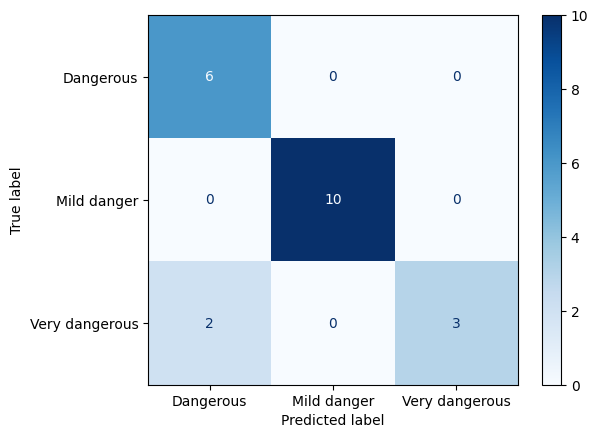

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame, with columns 'Accident Spot', 'Number of Spots', and 'Danger Category'

# Split the data into features and target
X = data[['Accident Spot', 'Number of Spots']]  # Features
y = data['Danger Category']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define a preprocessor to handle both numerical and text features
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=100), 'Accident Spot'),  # Vectorize the text
        ('num', StandardScaler(), ['Number of Spots'])  # Scale numerical features
    ]
)

# Create a pipeline with preprocessing and KNN classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))  # KNN with 3 neighbors
])

# Train the KNN model
pipeline.fit(X_train, y_train)

# Predict using the trained model
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='d')




OTHER EVALUATION METRICS 

In [103]:
print(metrics.classification_report(y_test, y_pred))

                precision    recall  f1-score   support

     Dangerous       0.75      1.00      0.86         6
   Mild danger       1.00      1.00      1.00        10
Very dangerous       1.00      0.60      0.75         5

      accuracy                           0.90        21
     macro avg       0.92      0.87      0.87        21
  weighted avg       0.93      0.90      0.90        21



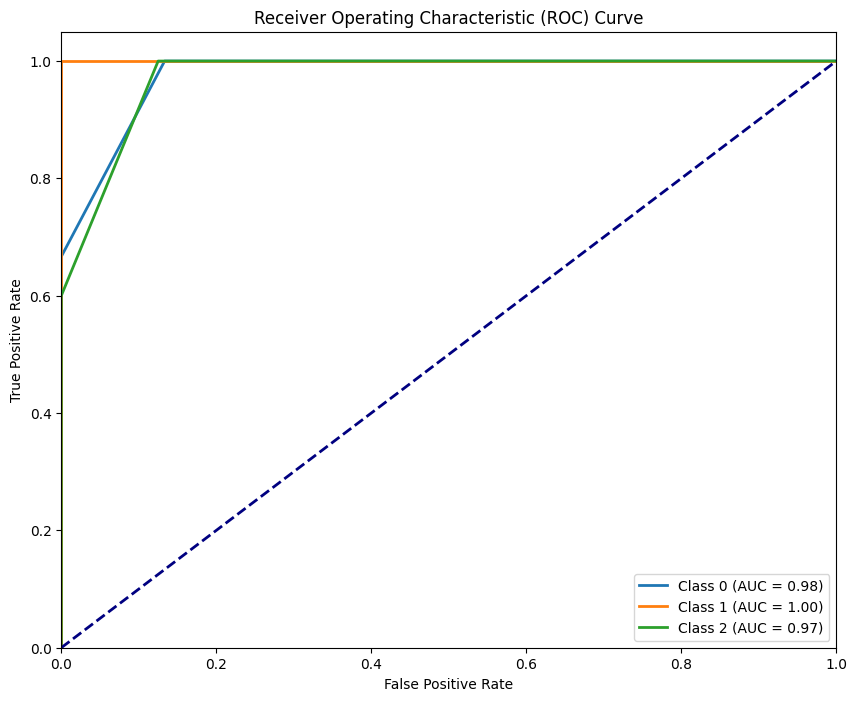

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'data' is your DataFrame, with columns 'Accident Spot', 'Number of Spots', and 'Danger Category'

# Split the data into features and target
X = data[['Accident Spot', 'Number of Spots']]  # Features
y = data['Danger Category']  # Target

# Binarize the labels for multi-class classification
y_bin = label_binarize(y, classes=np.unique(y))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.25, random_state=42)

# Define a preprocessor to handle both numerical and text features
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=100), 'Accident Spot'),  # Vectorize the text
        ('num', StandardScaler(), ['Number of Spots'])  # Scale numerical features
    ]
)

# Create a pipeline with preprocessing and KNN classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))  # KNN with 3 neighbors
])

# Train the KNN model
pipeline.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = pipeline.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_bin.shape[1]):  # Iterate over each class
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[i][:, 1])  # Get the ROC curve
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate AUC

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
